# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings
%matplotlib inline

random.seed(42)
np.random.seed(42)

In [5]:
warnings.filterwarnings('ignore')

### **Задание 0**
Для чего фиксируем сиды в домашках?

Чтобы сохранить результаты вывода при перезапусках ячеек и ноутбука в целом

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [3]:
#df_train = pd.read_csv('train.csv', index_col=0)
#df_test = pd.read_csv('test.csv', index_col=0)
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [7]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


пропуски наблюдаем в mileage, engine, max_power, torque, seats,  
плюс надо удалить порядковые номера для поиска дублей

In [12]:
sum(df_train.duplicated())

985

##### Получили 985 значений полных дубликатов

In [15]:
profile = ProfileReport(df_train, title='Report')

In [16]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
profile.to_file("profile.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Выводы:
1. Наблюдаем мультиколлиниарность в нескольких признаках.
2. Наличие пропущенных значений и дубликаты.
3. Распределение по данным смещено в большую сторону.

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [20]:
df_train.describe().T

count           mean            std      min       25%  \
year           6999.0    2013.818403       4.053095   1983.0    2011.0   
selling_price  6999.0  639515.197171  808941.911915  29999.0  254999.0   
km_driven      6999.0   69584.615517   57724.001817      1.0   35000.0   
seats          6797.0       5.419008       0.965767      2.0       5.0   

                    50%       75%         max  
year             2015.0    2017.0      2020.0  
selling_price  450000.0  675000.0  10000000.0  
km_driven       60000.0   97000.0   2360457.0  
seats               5.0       5.0        14.0

In [21]:
df_test.describe().T

count           mean            std      min       25%  \
year           1000.0    2013.681000       4.012149   1995.0    2011.0   
selling_price  1000.0  617901.042000  758553.860710  31000.0  250000.0   
km_driven      1000.0   71393.341000   48486.218662   1303.0   37000.0   
seats           981.0       5.410805       0.919985      4.0       5.0   

                    50%       75%        max  
year             2014.0    2017.0     2020.0  
selling_price  434999.0  670000.0  6000000.0  
km_driven       61500.0  100000.0   375000.0  
seats               5.0       5.0        9.0

In [22]:
df_train.describe(include=object).T

count unique                     top  freq
name          6999   1924  Maruti Swift Dzire VDI   116
fuel          6999      4                  Diesel  3793
seller_type   6999      3              Individual  5826
transmission  6999      2                  Manual  6095
owner         6999      5             First Owner  4587
mileage       6797    386               18.9 kmpl   197
engine        6797    120                 1248 CC   885
max_power     6803    316                  74 bhp   330
torque        6796    419          190Nm@ 2000rpm   468

In [23]:
df_test.describe(include=object).T

count unique                  top freq
name          1000    621  Maruti Alto 800 LXI   15
fuel          1000      4               Diesel  534
seller_type   1000      3           Individual  837
transmission  1000      2               Manual  877
owner         1000      5          First Owner  623
mileage        981    237            18.6 kmpl   23
engine         981     88              1248 CC  116
max_power      981    182               74 bhp   43
torque         981    226       200Nm@ 1750rpm   57

In [24]:
df_train.describe().T[['mean', '50%']]

mean       50%
year             2013.818403    2015.0
selling_price  639515.197171  450000.0
km_driven       69584.615517   60000.0
seats               5.419008       5.0

In [25]:
df_test.describe().T[['mean', '50%']]

mean       50%
year             2013.681000    2014.0
selling_price  617901.042000  434999.0
km_driven       71393.341000   61500.0
seats               5.410805       5.0

как видим что в трейне, что в тесте среднее значение больше медианы, значит распределение смещено вправо к большим значениям.
при сравнении между собой можно сказать, что критических различий нет и данные в группах совпадают

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [28]:
col = list(df_train.columns.values)
col.remove('selling_price')

In [29]:
sum(df_train.duplicated(subset=col))

1159

In [30]:
df_train[df_train.duplicated(subset=col)]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

In [31]:
df_train.drop_duplicates(inplace=True)
df_train.drop_duplicates(subset=col, inplace=True, keep='first')

In [32]:
assert df_train.shape == (5840, 13)

In [33]:
df_train.reset_index(inplace=True, drop=True)

In [34]:
df_train.head(5)

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [36]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [37]:
df_train['mileage'].value_counts()

mileage
18.9 kmpl      175
19.7 kmpl      137
18.6 kmpl      126
21.1 kmpl      118
17.0 kmpl      105
              ... 
14.5 kmpl        1
16.34 kmpl       1
20.88 km/kg      1
13.55 kmpl       1
16.51 kmpl       1
Name: count, Length: 386, dtype: int64

In [38]:
df_train['engine'].value_counts()

engine
1248 CC    758
1197 CC    589
796 CC     338
998 CC     335
2179 CC    283
          ... 
1422 CC      1
2496 CC      1
2487 CC      1
2596 CC      1
1950 CC      1
Name: count, Length: 120, dtype: int64

In [39]:
df_train['max_power'].value_counts()

max_power
74 bhp       260
88.5 bhp     148
67 bhp       130
46.3 bhp     127
67.1 bhp     117
            ... 
55.23 bhp      1
162 bhp        1
282 bhp        1
58.33 bhp      1
177.5 bhp      1
Name: count, Length: 316, dtype: int64

In [40]:
df_train[df_train['max_power'] == ' bhp']

name  year  selling_price  km_driven fuel seller_type  \
3586  Maruti Omni CNG  2000          80000     100000  CNG  Individual   

     transmission         owner     mileage  engine max_power torque  seats  
3586       Manual  Second Owner  10.9 km/kg  796 CC       bhp    NaN    8.0

In [41]:
df_train.loc[3586, 'max_power'] = np.NaN

In [42]:
def trans_torq(x):
    if pd.isna(x): return float(x)
    x = str(x).lower().replace(',', '').replace(' at', '@').replace(' nm', 'nm').replace(' nm@', 'nm@').replace(' kgm', 'kgm').replace(' rpm', '').replace('rpm', '').replace('/', '').strip().replace('~', '-').replace('+-', '+')
    if x.rfind('(kgm@)') > 0:
        x = x.replace('@', 'kgm@', 1).replace('(kgm@)', '')
    if x.rfind('(nm@)') > 0:
        x = x.replace('@', 'nm@', 1).replace('(nm@)', '')   
    return x

In [43]:
def max_torq(x):
    if pd.isna(x): return float(x)
    tmp = x.split()
    if len(tmp) < 2:
        return np.NaN
    if tmp[1].find('+') > 0:
        tmp2 = [float(i) for i in tmp[1].split('+')]
        return tmp2[0] + tmp2[1]
    tmp2 = [float(i) for i in tmp[1].split('-')]
    return max(tmp2)

In [44]:
def torq(x):
    if pd.isna(x): return float(x)
    x = x.split()[0]
    if x.find('nm') > 0:
        return float(x[:x.find('nm')])
    elif x.find('kgm') > 0:
        return float(x[:x.find('kgm')])*9.81
    elif x.find('(') > 0:
        return float(x[:x.find('(')])
    elif x.find('@') > 0:
        return float(x[:x.find('@')])
    else:
        return float(x)

In [45]:
def kmkg_to_kmpl(x):
    if pd.isna(x):
        return float(x)
    if str(x).endswith('kmpl'):
        return float(str(x)[:-5])
    elif str(x).endswith('km/kg'):
        return float(str(x)[:-6])*1.4

In [46]:
def transform(df):
    df['mileage'] = df['mileage'].apply(kmkg_to_kmpl)
    df['engine'] = df['engine'].apply(lambda x: float(str(x).split(' ')[0]))
    df['max_power'] = df['max_power'].apply(lambda x: float(str(x).split(' ')[0]))
    df['torque'] = df['torque'].apply(trans_torq)
    df['max_torq'] = df['torque'].apply(max_torq)
    df['torque_npm'] = df['torque'].apply(torq)
    df.drop('torque', axis=1, inplace=True)
    return

In [47]:
transform(df_train)
transform(df_test)

In [49]:
df_train.head(3)

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   

  seller_type transmission         owner  mileage  engine  max_power  seats  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00    5.0   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52    5.0   
2  Individual       Manual   First Owner    23.00  1396.0      90.00    5.0   

   max_torq  torque_npm  
0    2000.0     190.000  
1    2500.0     250.000  
2    2750.0     219.744

In [50]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
max_torq         float64
torque_npm       float64
dtype: object

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






У нас средняя смещена вправо и она более подвержена выбросам, а вот медиана нет. Поэтому лучше взять её.
медиану нужно считать по тестовым свою, по тренировочным свою потому что в данных может немного отличаться распределение.

In [53]:
def fill(df):
    df['mileage'] = df['mileage'].fillna(df['mileage'].median())
    df['engine'] = df['engine'].fillna(df['engine'].median())
    df['max_power'] = df['max_power'].fillna(df['max_power'].median())
    df['max_torq'] = df['max_torq'].fillna(df['max_torq'].median())
    df['torque_npm'] = df['torque_npm'].fillna(df['torque_npm'].median())
    df['seats'] = df['seats'].fillna(df['seats'].median())
    return

In [54]:
fill(df_train)
fill(df_test)

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   float64
 12  max_torq       5840 non-null   float64
 13  torque_npm     5840 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   float64
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   float64
 12  max_torq       1000 non-null   float64
 13  torque_npm     1000 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 109.5+ KB


### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [58]:
def to_int(df):
    df['engine'] = df['engine'].astype(int)
    df['seats'] = df['seats'].astype(int)
    return

In [59]:
to_int(df_train)
to_int(df_test)

потому что в seats ограниченное количество значений и их можно было бы разбить на категории.

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [62]:
df_train.describe().T

count           mean            std        min       25%  \
year           5840.0    2013.428425       4.095622   1983.000    2011.0   
selling_price  5840.0  522960.091096  535432.001912  29999.000  250000.0   
km_driven      5840.0   73952.242466   60071.136504      1.000   39000.0   
mileage        5840.0      19.547135       4.228290      0.000      17.0   
engine         5840.0    1429.448973     485.662834    624.000    1197.0   
max_power      5840.0      87.906371      31.640418      0.000      68.0   
seats          5840.0       5.426712       0.982344      2.000       5.0   
max_torq       5840.0    3046.645205     912.076209   1400.000    2250.0   
torque_npm     5840.0     175.362665     107.161739     47.088     111.8   

                     50%         75%           max  
year             2014.00    2017.000  2.020000e+03  
selling_price  405000.00  640000.000  1.000000e+07  
km_driven       70000.00  100000.000  2.360457e+06  
mileage            19.40      22.320  4.681600e+01  
engine           1248.00    1498.000  3.604000e+03  
max_power          81.86      99.000  4.000000e+02  
seats               5.00       5.000  1.400000e+01  
max_torq         3000.00    4000.000  2.180000e+04  
torque_npm        160.00     200.124  1.863900e+03

Да немного подвинуло, потому что около 5 процентов данных мы заполнили медианными значениями а также удалили дубликаты из данных.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

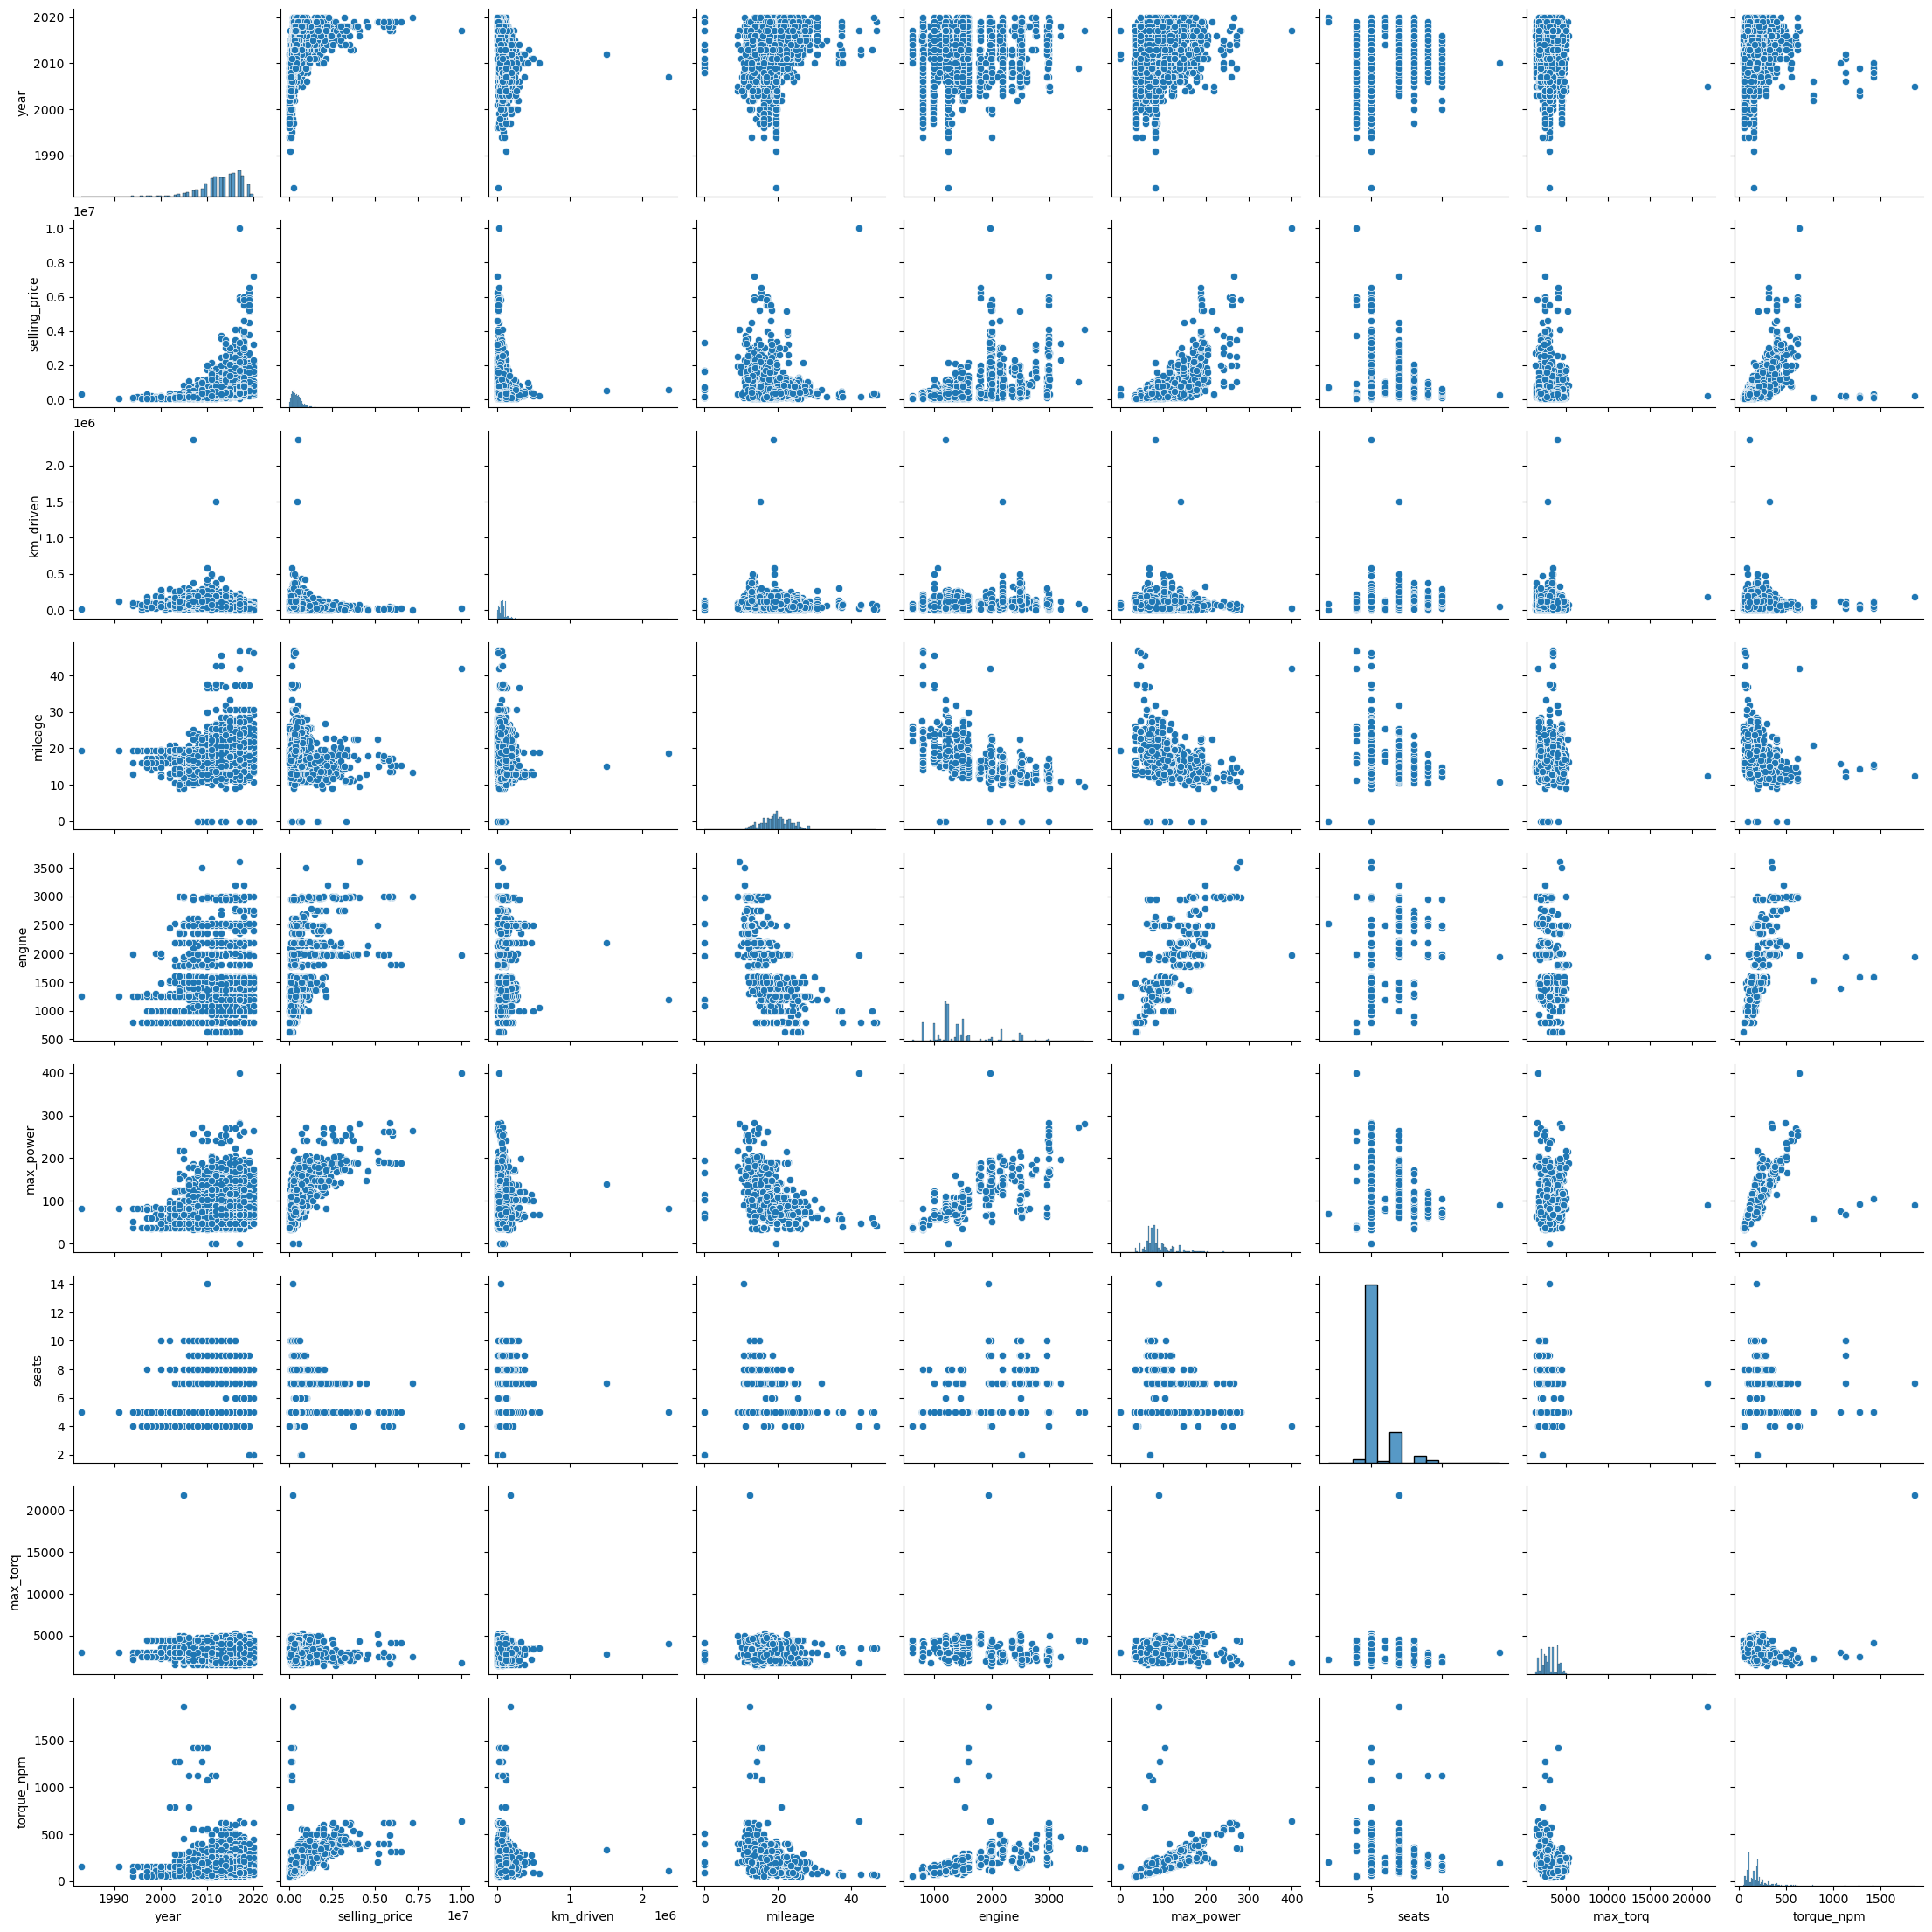

In [67]:
sns.pairplot(df_train)
plt.show()

Имеется связь между годом выпуска, пробегом типом двигателя с целевой переменной и есть небольшая связь с оборотами двигателя. Также между годом выпуска и целевой переменной видно что есть кореляция, как и между пробегом и целевой переменной.

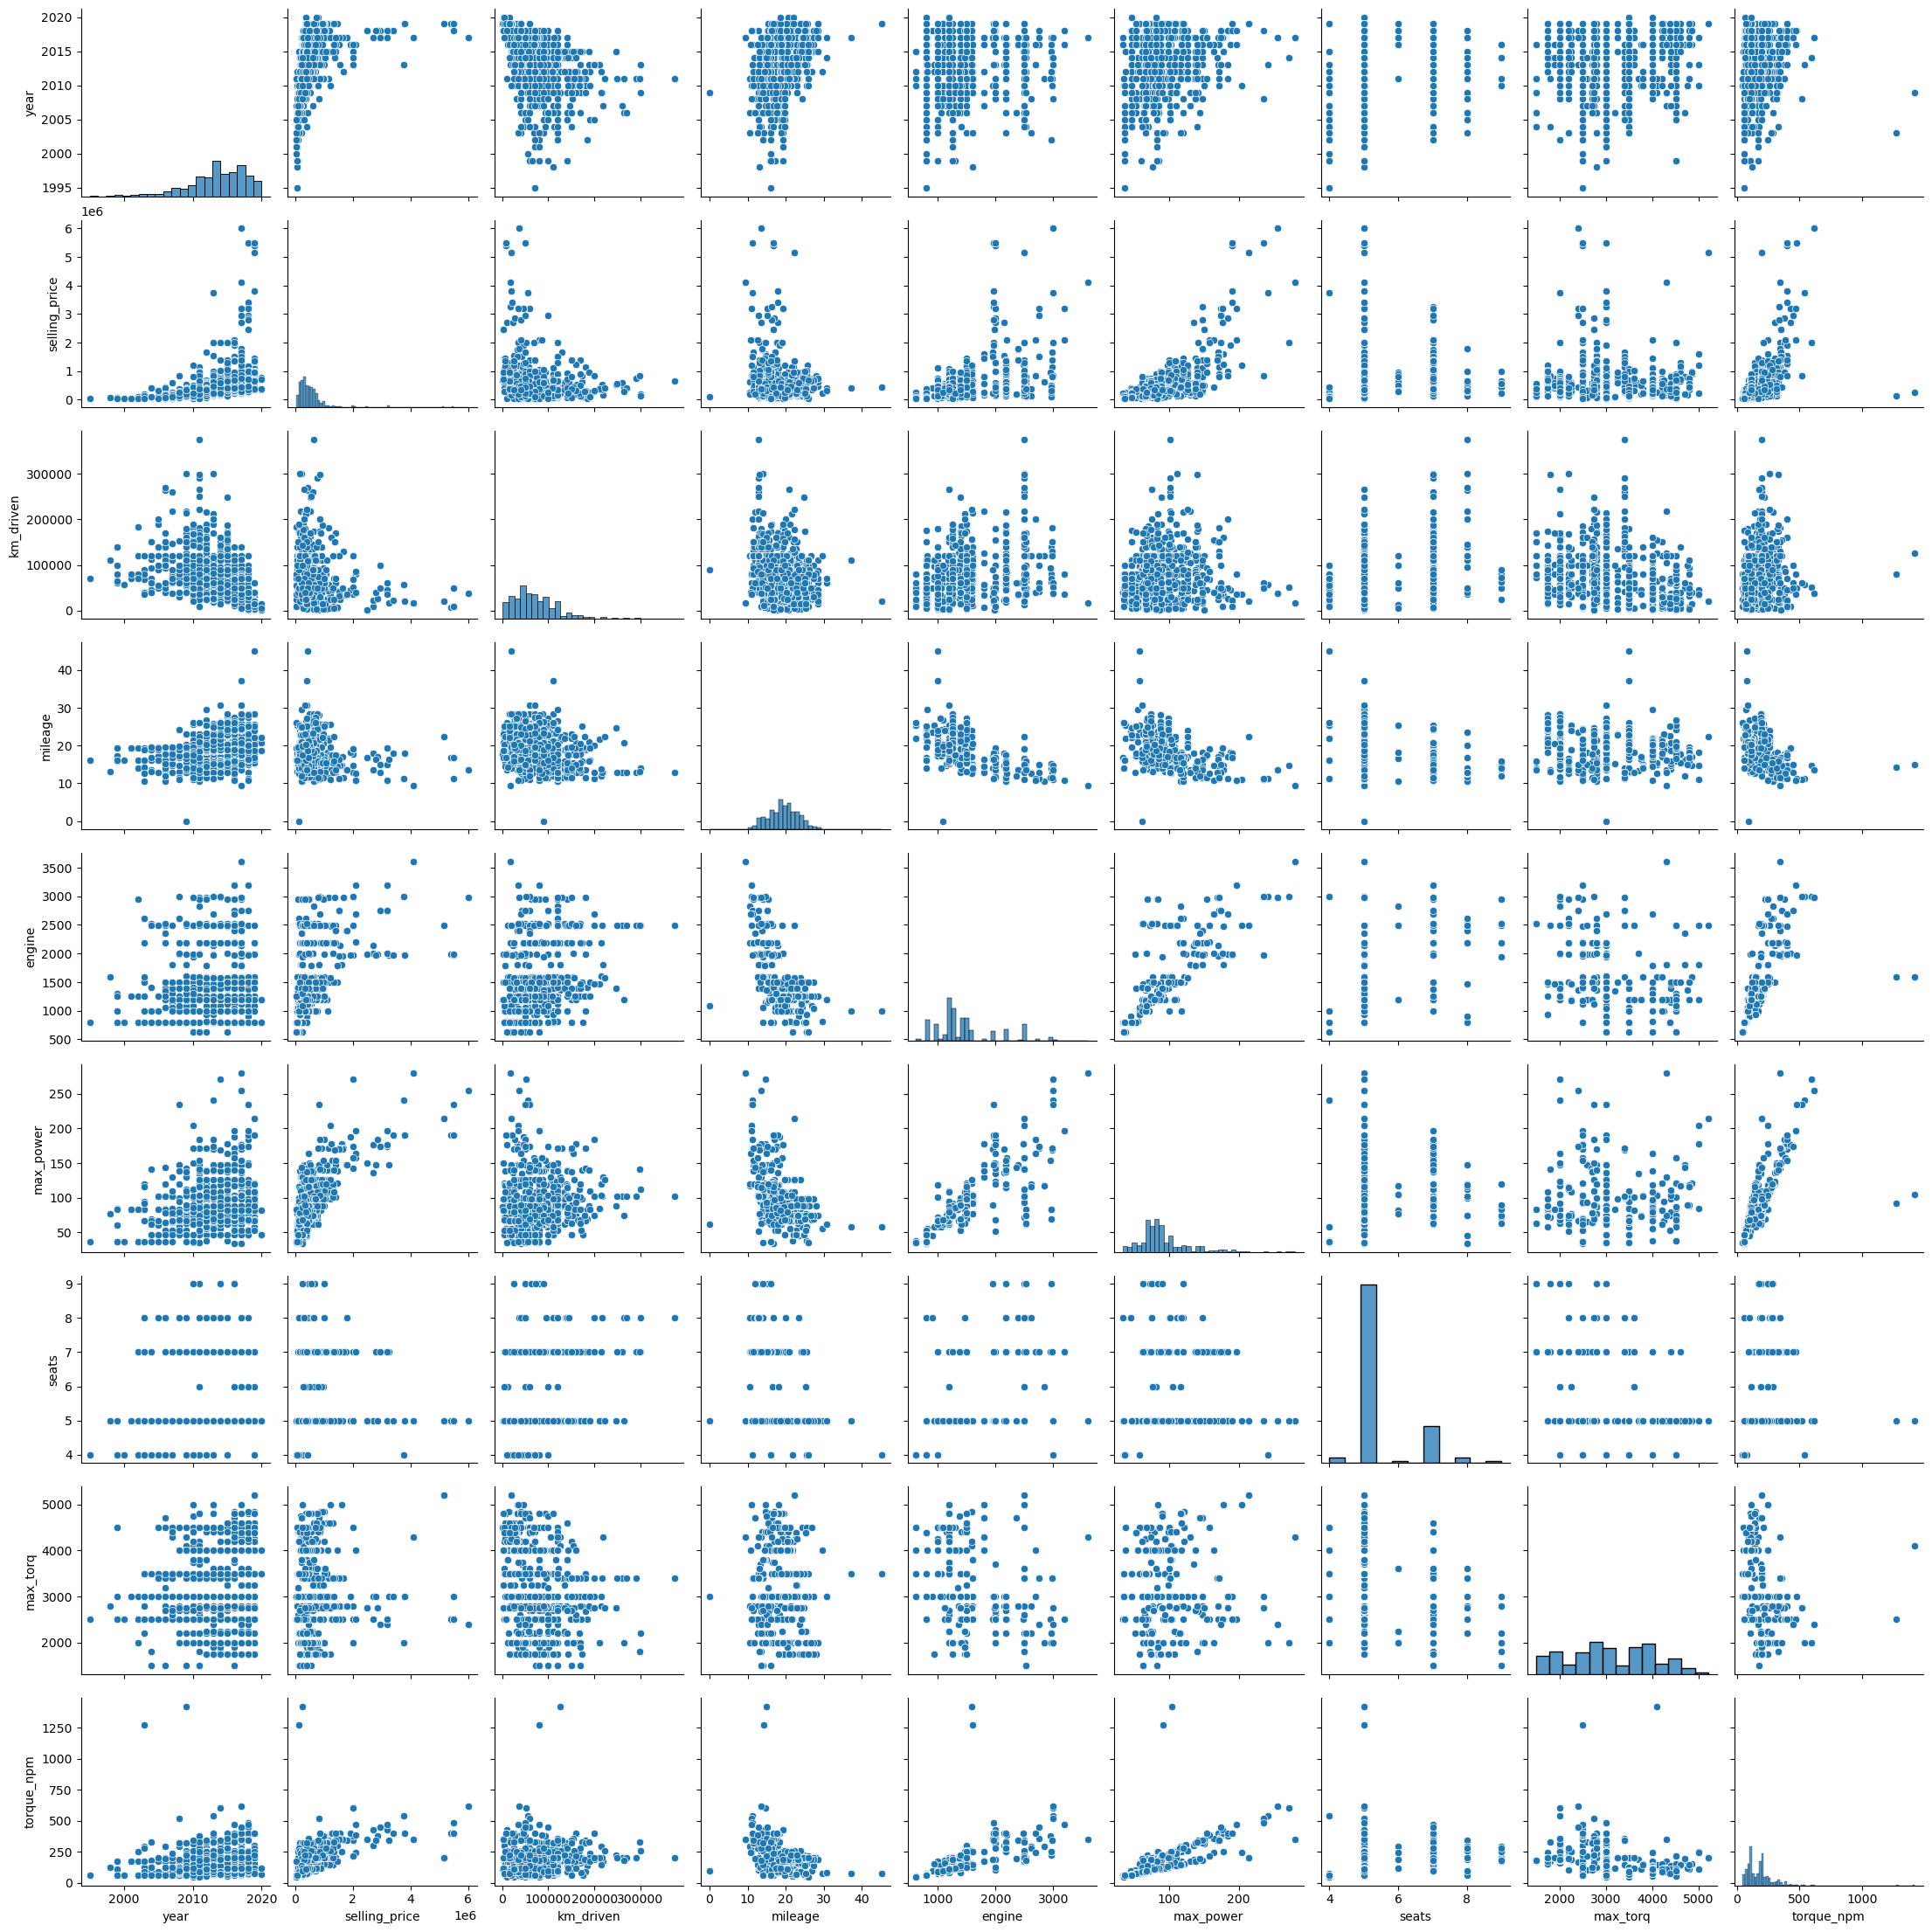

In [69]:
sns.pairplot(df_test)
plt.show()

Смотря на гисторграммы видим, что данные разбиты примерно в одинаковых группах. и прослеживаются теже зависимости что и в трейне.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [72]:
corr = df_train.corr(numeric_only=True)

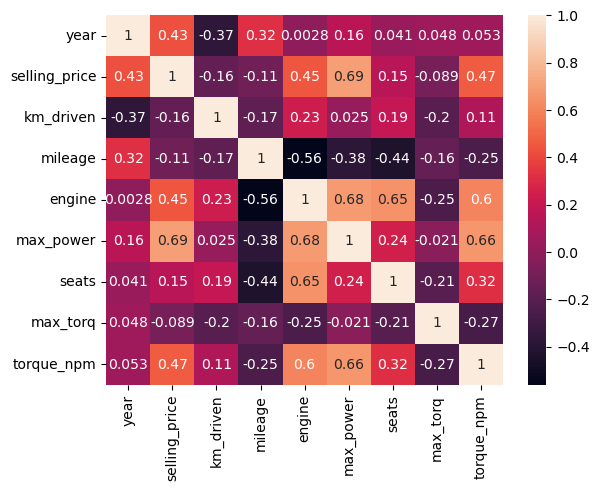

In [73]:
sns.heatmap(corr, annot=True)
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Наимение скоррелированы между собой это year и engine, их корреляция состовляет всего 0.0028
Сильная кореляция наблюдается между признаком engine и max_power, seats, tourque_npm.
Корелируют с целевой переменной engine, max_power, year и tourque_npm, но некоторые из этих признаков коллиниарны и между собой.
Из графиков видно, что действительно чем меньше год выпуска, тем меньше пробег у авто.

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [77]:
def spir(x, y):
    x_rank = np.argsort(np.argsort(x)) # расчет ранга по первому признаку
    y_rank = np.argsort(np.argsort(y)) # расчет ранга по второму признаку
    d2 = (x_rank - y_rank)**2 # возводим разность рангов в квадрат для подсчета их суммы по наблюдениям
    n = x.size
    r_spir = 1 - 6 * sum(d2) / (n * (n**2 - 1)) # сама формула кореляции
    return r_spir

In [78]:
def corr_spir(df):
    data = []
    for i in df.columns:
        tmp = []
        for j in df.columns:
            tmp.append(spir(df[i], df[j]))
        data.append(tmp)
    return pd.DataFrame(data, columns=df.columns, index=df.columns)

In [79]:
spir(df_train['year'], df_train['selling_price'])

0.7050604986492461

In [80]:
X = df_train[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'max_torq', 'torque_npm']]

In [81]:
corr_spir(X)

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.705060  -0.566218  0.337099 -0.034677   
selling_price  0.705060       1.000000  -0.295699  0.017097  0.461866   
km_driven     -0.566218      -0.295699   1.000000 -0.195263  0.303411   
mileage        0.337099       0.017097  -0.195263  1.000000 -0.437492   
engine        -0.034677       0.461866   0.303411 -0.437492  1.000000   
max_power      0.166875       0.612352   0.040464 -0.318638  0.711526   
seats          0.050485       0.220670   0.105454 -0.310094  0.361660   
max_torq       0.071432      -0.128938  -0.318030 -0.167071 -0.370427   
torque_npm     0.103461       0.581203   0.242360 -0.174871  0.840118   

               max_power     seats  max_torq  torque_npm  
year            0.166875  0.050485  0.071432    0.103461  
selling_price   0.612352  0.220670 -0.128938    0.581203  
km_driven       0.040464  0.105454 -0.318030    0.242360  
mileage        -0.318638 -0.310094 -0.167071   -0.174871  
engine          0.711526  0.361660 -0.370427    0.840118  
max_power       1.000000  0.200687 -0.025185    0.778857  
seats           0.200687  1.000000 -0.130321    0.286407  
max_torq       -0.025185 -0.130321  1.000000   -0.524011  
torque_npm      0.778857  0.286407 -0.524011    1.000000

Как видим значения близки но немного отличаются

In [83]:
corr_sp = df_train.corr(numeric_only=True, method='spearman')
corr_sp

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.707123  -0.569659  0.340316 -0.038056   
selling_price  0.707123       1.000000  -0.295665  0.017140  0.463577   
km_driven     -0.569659      -0.295665   1.000000 -0.195916  0.304504   
mileage        0.340316       0.017140  -0.195916  1.000000 -0.438473   
engine        -0.038056       0.463577   0.304504 -0.438473  1.000000   
max_power      0.165798       0.612258   0.040919 -0.318908  0.713113   
seats          0.048291       0.317605   0.195317 -0.437778  0.527716   
max_torq       0.076177      -0.128278  -0.321286 -0.168215 -0.373703   
torque_npm     0.102227       0.582094   0.243154 -0.174381  0.842425   

               max_power     seats  max_torq  torque_npm  
year            0.165798  0.048291  0.076177    0.102227  
selling_price   0.612258  0.317605 -0.128278    0.582094  
km_driven       0.040919  0.195317 -0.321286    0.243154  
mileage        -0.318908 -0.437778 -0.168215   -0.174381  
engine          0.713113  0.527716 -0.373703    0.842425  
max_power       1.000000  0.304857 -0.026137    0.779633  
seats           0.304857  1.000000 -0.203730    0.438209  
max_torq       -0.026137 -0.203730  1.000000   -0.527264  
torque_npm      0.779633  0.438209 -0.527264    1.000000

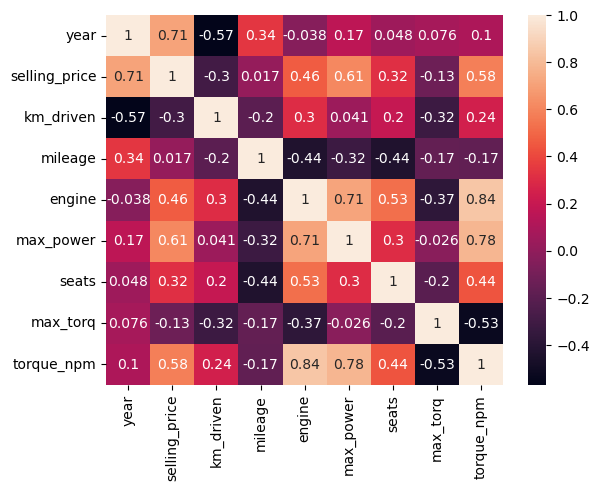

In [84]:
sns.heatmap(corr_sp, annot=True)
plt.show()

In [105]:
import phik

In [116]:
corr_phik = phik.phik_matrix(df_train)
corr_phik

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'max_torq', 'torque_npm']


name      year  selling_price  km_driven      fuel  \
name           1.000000  0.948995       0.994871   0.000000  1.000000   
year           0.948995  1.000000       0.219841   0.081574  0.205834   
selling_price  0.994871  0.219841       1.000000   0.000000  0.157885   
km_driven      0.000000  0.081574       0.000000   1.000000  0.046285   
fuel           1.000000  0.205834       0.157885   0.046285  1.000000   
seller_type    0.799127  0.232412       0.334505   0.000000  0.050771   
transmission   1.000000  0.153714       0.463058   0.012824  0.053721   
owner          0.830098  0.418636       0.557641   0.087887  0.030943   
mileage        0.999065  0.277748       0.448047   0.181072  0.639258   
engine         1.000000  0.213156       0.503682   0.210747  0.644421   
max_power      0.997906  0.381639       0.872166   0.000000  0.236006   
seats          0.999985  0.288178       0.196447   0.096223  0.450714   
max_torq       0.999946  0.269787       0.204000   0.049779  0.564479   
torque_npm     0.999978  0.185089       0.687135   0.000000  0.349334   

               seller_type  transmission     owner   mileage    engine  \
name              0.799127      1.000000  0.830098  0.999065  1.000000   
year              0.232412      0.153714  0.418636  0.277748  0.213156   
selling_price     0.334505      0.463058  0.557641  0.448047  0.503682   
km_driven         0.000000      0.012824  0.087887  0.181072  0.210747   
fuel              0.050771      0.053721  0.030943  0.639258  0.644421   
seller_type       1.000000      0.127968  0.176612  0.062066  0.160346   
transmission      0.127968      1.000000  0.096990  0.241317  0.520161   
owner             0.176612      0.096990  1.000000  0.211813  0.186011   
mileage           0.062066      0.241317  0.211813  1.000000  0.661967   
engine            0.160346      0.520161  0.186011  0.661967  1.000000   
max_power         0.331904      0.511877  0.121438  0.530279  0.720780   
seats             0.032173      0.045734  0.046741  0.523230  0.603400   
max_torq          0.149248      0.030724  0.111955  0.263420  0.641002   
torque_npm        0.147800      0.362304  0.059774  0.294369  0.611920   

               max_power     seats  max_torq  torque_npm  
name            0.997906  0.999985  0.999946    0.999978  
year            0.381639  0.288178  0.269787    0.185089  
selling_price   0.872166  0.196447  0.204000    0.687135  
km_driven       0.000000  0.096223  0.049779    0.000000  
fuel            0.236006  0.450714  0.564479    0.349334  
seller_type     0.331904  0.032173  0.149248    0.147800  
transmission    0.511877  0.045734  0.030724    0.362304  
owner           0.121438  0.046741  0.111955    0.059774  
mileage         0.530279  0.523230  0.263420    0.294369  
engine          0.720780  0.603400  0.641002    0.611920  
max_power       1.000000  0.569587  0.264713    0.825301  
seats           0.569587  1.000000  0.316711    0.365282  
max_torq        0.264713  0.316711  1.000000    0.954332  
torque_npm      0.825301  0.365282  0.954332    1.000000

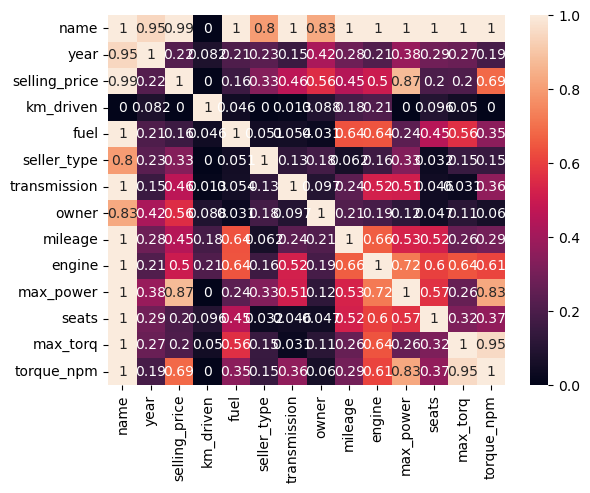

In [123]:
sns.heatmap(corr_phik, annot=True)
plt.show()

Кореляция спирмана выделила большую кореляцию между годом выпуска авто и его мощностью с целевой переменной.
Кореляция по Хи^2, дает возможность рассматривать категориальные переменные, однако появились сильные зависимости, которые не правдивы. Например зависимость от названия машины практически у всех 1.

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

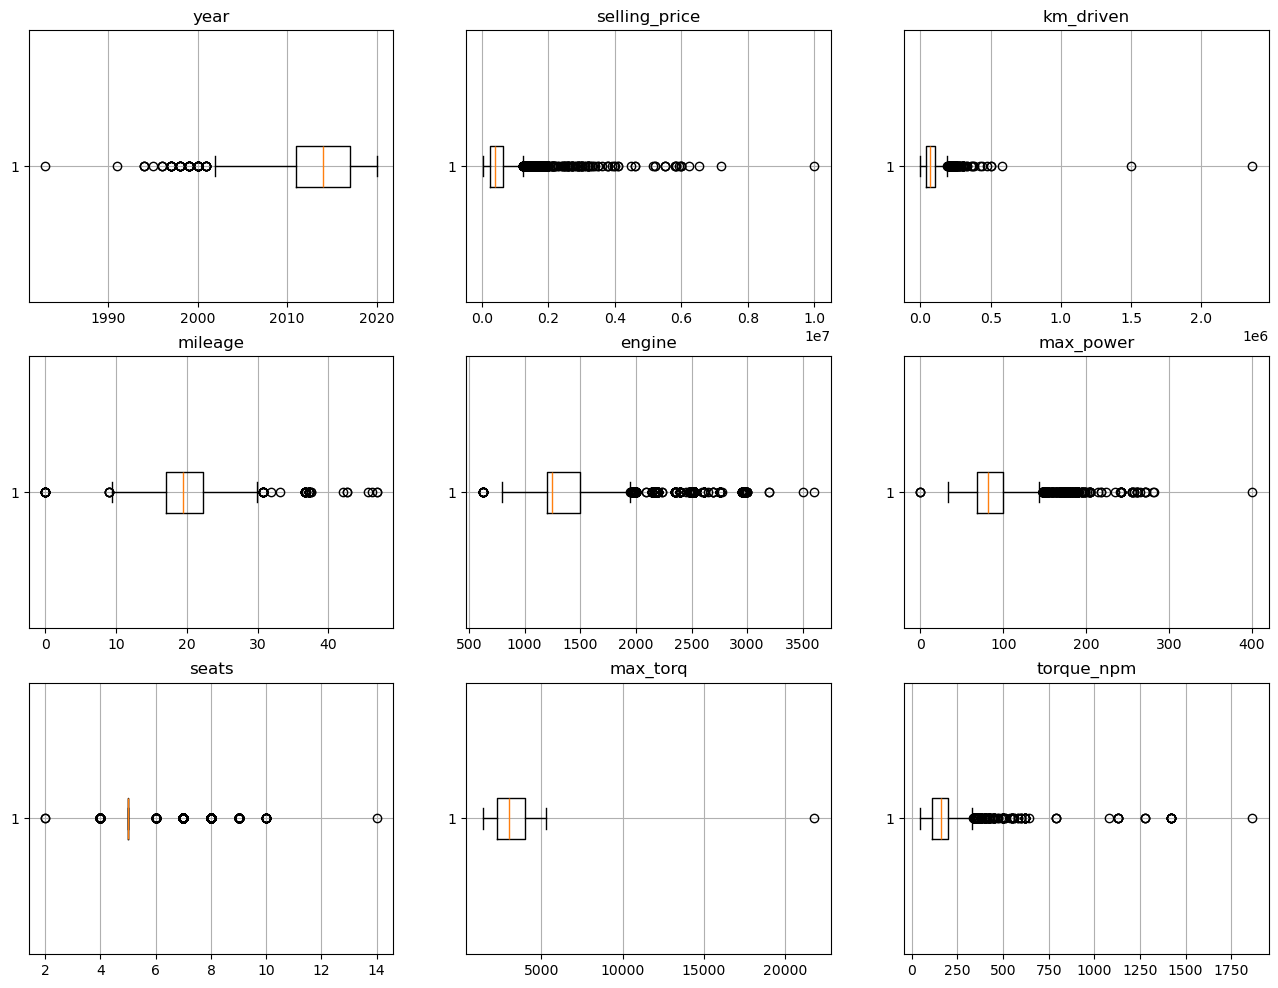

In [126]:
num_cols = len(X.columns)
fig, axes = plt.subplots(nrows = (num_cols//3) + (num_cols%3), ncols=3, figsize=(16, (num_cols//3 + 1) * 3))
for ax, col in zip(axes.flatten(), X.columns):
    ax.boxplot(df_train[col], vert=False)
    ax.set_title(f'{col}')
    ax.grid()
plt.show()

На некоторых графиках например max_torq фиксируем аномальные значения. Ну не может быть 20000 оборотов)

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [130]:
col = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'max_torq', 'torque_npm']

In [131]:
X_train = df_train[col]
y_train = df_train['selling_price']
X_test = df_test[col]
y_test = df_test['selling_price']

In [132]:
X_train.shape

(5840, 8)

In [133]:
#не может быть 6 признаков, сейчас их 8. Только если удалить мультиколлиниарные тогда останется 6.
#assert X_train.shape == (5840, 6)

In [134]:
#Тоже самое и на тестовых данных
#assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

In [137]:
def model_err(model, X_train, y_train, X_test, y_test):
    train_mse = MSE(y_train, model.predict(X_train))
    train_R2 = r2_score(y_train, model.predict(X_train))
    print(f'train_r2 {train_R2}, train_mse {train_mse}')

    test_mse = MSE(y_test, model.predict(X_test))
    test_R2 = r2_score(y_test, model.predict(X_test))
    print(f'test_r2 {test_R2}, train_mse {test_mse}')
    return

In [138]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_lr1 = lr.predict(X_test)
model_err(lr, X_train, y_train, X_test, y_test)

train_r2 0.6009731811598604, train_mse 114376384312.57101
test_r2 0.6001607049399661, train_mse 229839044466.85306


Метрика MSE довольно не информативна потому что значения находятся в квадрате. По метрике R2 видим, что модели схожие и качество 0.6 достаточно высокое. 

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [141]:
def R2(y_true, y_pred):
    SSE = sum((y_true - y_pred)**2) # сумма квадратов ошибок регрессии
    SST = sum((y_true - y_true.mean())**2) # сумма квадратов отклонения от среднего значения
    r2 = 1 - SSE/SST
    return r2

In [142]:
R2(y_test, lr.predict(X_test))

0.600160704939966

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [144]:
def R2_adj(y_true, y_pred, k):
    SSE = sum((y_true - y_pred)**2) # сумма квадратов ошибок регрессии
    SST = sum((y_true - y_true.mean())**2) # сумма квадратов отклонения от среднего значения
    n = y_true.size # количество наблюдений
    # k - число независимых признаков
    r2_adj = 1 - (SSE * (n - k)) / (SST * (n - 1))
    return r2_adj

In [145]:
R2_adj(y_test, lr.predict(X_test), len(X_test.columns))

0.6029623816821285

R2_adj применяется при большом количестве признаков в модели и вводит штраф за их большое количество.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [149]:
lr.fit(X_train_sc, y_train)
y_test_lrsc = lr.predict(X_test_sc)
model_err(lr, X_train_sc, y_train, X_test_sc, y_test)

train_r2 0.6009731811598572, train_mse 114376384312.57196
test_r2 0.6001607049399651, train_mse 229839044466.85364


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [151]:
pd.DataFrame(lr.coef_.reshape(1, -1), columns=sc.feature_names_in_)

year     km_driven      mileage        engine      max_power  \
0  163022.694517 -49241.525523 -1912.590517  25812.830307  329258.118379   

         seats      max_torq   torque_npm  
0 -29037.13126 -56381.898273  7395.028608

самым информативным оказался max_power

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [154]:
from sklearn.linear_model import Lasso

L1 = Lasso()

In [155]:
L1.fit(X_train_sc, y_train)
y_test_L1sc = L1.predict(X_test_sc)
model_err(L1, X_train_sc, y_train, X_test_sc, y_test)

train_r2 0.6009731811215067, train_mse 114376384323.56468
test_r2 0.6001594663952317, train_mse 229839756417.7339


In [156]:
L1.coef_

array([163020.99477913, -49240.57182537,  -1909.98178841,  25811.06194648,
       329259.07143344, -29033.66522636, -56380.02893866,   7394.49571177])

Результаты особо не поменялись, значит признаки все существенные и нужны, либо коэфициент алфа слишком низкий

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
%%time
L1 = Lasso()
#alpha штрафующий коэфициент, max_iter - максимальное количество итераций
param_grid = {'alpha': [1, 10, 100, 1000, 10000, 20000, 50000, 100000], 'max_iter': [1000, 10000, 100000]}
gs = GridSearchCV(L1, param_grid, cv=10)
model_grid = gs.fit(X_train_sc, y_train)
y_test_gsL1 = gs.predict(X_test_sc)

CPU times: total: 15.6 ms
Wall time: 1.68 s


In [169]:
model_err(model_grid, X_train_sc, y_train, X_test_sc, y_test)

train_r2 0.5942801207629514, train_mse 116294872023.26999
test_r2 0.5758572177064254, train_mse 243809382930.28668


In [170]:
pd.DataFrame(model_grid.best_estimator_.coef_.reshape(1, -1), columns=sc.feature_names_in_)

year     km_driven  mileage  engine      max_power  seats  \
0  148532.080365 -28346.221581      0.0     0.0  327602.972196   -0.0   

      max_torq  torque_npm  
0 -33459.38611         0.0

In [178]:
model_grid.best_estimator_

Lasso(alpha=20000)

обучился достаточно быстро, но потратил больше времени чем на одну модель.
Занулил 4 признака нам. Лучший коэффициент alpha = 20000

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [198]:
from sklearn.linear_model import ElasticNet

In [200]:
%%time
en = ElasticNet()
# alpha штрафующий коэфициент, max_iter - максимальное количество итераций
# l1_ratio - коэфициент важности l1 регуляризации перед l2
param_grid = {'alpha': [1, 10, 100, 1000, 10000, 20000, 50000, 100000], 'l1_ratio': [0, 0.2, 0.5, 0.8, 1.0], 'max_iter': [1000, 5000]}
gs = GridSearchCV(en, param_grid, cv=10)
gs.fit(X_train_sc, y_train)
y_test_gsEN = gs.predict(X_test_sc)

CPU times: total: 2.03 s
Wall time: 2min 23s


In [202]:
model_err(model_grid, X_train_sc, y_train, X_test_sc, y_test)

train_r2 0.5942801207629514, train_mse 116294872023.26999
test_r2 0.5758572177064254, train_mse 243809382930.28668


In [204]:
pd.DataFrame(model_grid.best_estimator_.coef_.reshape(1, -1), columns=sc.feature_names_in_)

year     km_driven  mileage  engine      max_power  seats  \
0  148532.080365 -28346.221581      0.0     0.0  327602.972196   -0.0   

      max_torq  torque_npm  
0 -33459.38611         0.0

In [206]:
model_grid.best_estimator_

Lasso(alpha=20000)

обучался уже дольше чем первый вариант, но чем больше параметров тем дольше обучается. Также занулилось 4 признака и используется полность l1 регуляризация

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [140]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [208]:
df_train['name'] = df_train['name'].apply(lambda x: x.split(" ")[0])
df_test['name'] = df_test['name'].apply(lambda x: x.split(" ")[0])

In [210]:
df_train['seats'] = df_train['seats'].astype('object')
df_test['seats'] = df_test['seats'].astype('object')

In [212]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner  seats
count     5840    5840        5840         5840         5840   5840
unique      30       4           3            2            5      9
top     Maruti  Diesel  Individual       Manual  First Owner      5
freq      1804    3177        5223         5336         3603   4618

In [144]:
# после добавления фичей, не будет биться по числу столбцов
# assert X_train_cat.shape == (5840, 11)

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [214]:
X_train = df_train.drop('selling_price', axis=1)
X_test = df_test.drop('selling_price', axis=1)
y_train = df_train['selling_price']
y_test = df_test['selling_price']

In [216]:
mask = (X_train.dtypes == 'object').values

In [218]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge


num_trans = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_trans = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_trans, X_train.columns[~mask]),
        ('cat', cat_trans, X_train.columns[mask])
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

Нужно явно подавать какие столбцы будут обработаны, плюс следует использовать библиотечный вариант из sklearn, так как если использова pd.get_dummies и вдруг в тесте не окажется значений, которые были в трейне, то модель не заработает. А вариант из sklearn обработает этот случай.
Мы удаляем столбец чтобы избежать повторения, так как на 2 признака нужен 1 столбец кодировщик. А на 3 и далее n-1 столбцов.
Их удалять нельзя иначе мы не поймем оставшиеся из-за смещения кодировки.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [220]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'model__alpha': [0.1, 0.5, 1, 10, 50]}
gs = GridSearchCV(pipeline, param_grid, cv=10, scoring='r2')
gs.fit(X_train, y_train)
y_test_R = gs.predict(X_test)

In [222]:
model_err(gs, X_train, y_train, X_test, y_test)

train_r2 0.7722329473457314, train_mse 65286769505.492805
test_r2 0.7829305976505654, train_mse 124777691025.8258


С категориальными фичами точность повысилась почти на 20 процентов.

In [224]:
# сохраняем модель
import pickle
with open('model.pickle', 'wb') as file:
          pickle.dump(gs, file)

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [226]:
Q = df_train.copy()
Qt = df_test.copy()

In [228]:
Q['year'] = Q['year'].apply(lambda x: x**2)
Qt['year'] = Qt['year'].apply(lambda x: x**2)

In [230]:
gs.fit(Q, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'max_torq',
       'torque_npm'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats'], dtype='object'))])),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.1, 0.5, 1, 10, 50]}, scoring='r2')

In [232]:
model_err(gs, Q, y_train, Qt, y_test)

train_r2 0.7723426039894702, train_mse 65255337707.341606
test_r2 0.7829789117845614, train_mse 124749918681.96402


После возведения года в квадрат, значения метрик практически не поменялось

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [234]:
def business_metrics(y_true, y_pred):
    print(f'Доля прогнозов где цены не отличаются от реальной не более чем на 10 % = {round(sum(abs(1 - y_true/y_pred) <= 0.1) / y_true.size * 100, 1)}% от всех прогнозов')

business_metrics(y_test, y_test_lr1)
business_metrics(y_test, y_test_L1sc)
business_metrics(y_test, y_test_L1sc)
business_metrics(y_test, y_test_gsL1)
business_metrics(y_test, y_test_gsEN)
business_metrics(y_test, y_test_R)

Доля прогнозов где цены не отличаются от реальной не более чем на 10 % = 24.4% от всех прогнозов
Доля прогнозов где цены не отличаются от реальной не более чем на 10 % = 24.4% от всех прогнозов
Доля прогнозов где цены не отличаются от реальной не более чем на 10 % = 24.4% от всех прогнозов
Доля прогнозов где цены не отличаются от реальной не более чем на 10 % = 24.1% от всех прогнозов
Доля прогнозов где цены не отличаются от реальной не более чем на 10 % = 24.1% от всех прогнозов
Доля прогнозов где цены не отличаются от реальной не более чем на 10 % = 30.9% от всех прогнозов


Лучшая как и по нашим офлайн метрикам оказалась модель с категориальными признаками и Ridge регрессией.

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [156]:
def your_business_metrics(y_true, y_pred):

business_metrics(# your code here)

IndentationError: expected an indented block after function definition on line 1 (2995211423.py, line 3)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>

In [ ]:
#Это кот Елены